# Boston Housing Linear Regression with TF

Boston housing dataset, which can be downloaded from the UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/Housing. s also available as a preprocessed dataset with scikit-learn.

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from numpy import genfromtxt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

%matplotlib inline

C:\Users\dloperab\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


We need to prepare the training set consisting of features and labels from the Boston housing dataset. The *read_boston_data()* method reads from scikit-learn and returns the features and labels separately:

In [15]:
def read_boston_data():
    boston = load_boston()
    features = np.array(boston.data)
    labels = np.array(boston.target)
    
    return features, labels

Now that we have the features and labels, we need to normalize the features as well, using the *normalizer()* method:

In [16]:
def normalizer(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    
    return (dataset - mu)/sigma

*bias_vector()* is used to append the bias term (that is all 1s) to the normalized features that we prepared in the preceding step. It corresponds to the **b** term:

In [17]:
def bias_vector(features, labels):
    n_training_samples = features.shape[0]
    n_dim = features.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),features], [n_training_samples, n_dim + 1])
    l = np.reshape(labels, [n_training_samples, 1])
    
    return f, l

We will now invoke these methods and split the dataset into training and testing, 75% for training and rest for testing:

In [18]:
features, labels = read_boston_data()
normalized_features = normalizer(features)
data, label = bias_vector(normalized_features, labels)
n_dim = data.shape[1]
trainX, testX, trainY, testY = train_test_split(data, label, test_size=0.25, random_state=100)

Now let's use TensorFlow's data structures (such as placeholders, labels, and weights):

In [19]:
learning_rate = 0.01
training_epochs = 100000
log_loss = np.empty(shape=[1], dtype=float)
X = tf.placeholder(tf.float32, [None, n_dim]) #takes any number of rows but n_dim columns
Y = tf.placeholder(tf.float32, [None,1]) # #takes any number of rows but only 1 continuous column
W = tf.Variable(tf.ones([n_dim, 1])) # W weight vector

We have prepared the data structure required to construct the TensorFlow graph. Now it's time to construct the linear regression, which is pretty straightforward:

In [20]:
y_ = tf.matmul(X, W)
cost_op = tf.reduce_mean(tf.square(y_ - Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_op)

In the preceding code segment, the first line multiplies the features matrix by the weights matrix that can be used for prediction. The second line computes the loss, which is the squared error of the regression line. Finally, the third line performs one-step of GD optimization to minimize the square error.

Now, before we start training the model, we need to initialize all the variables using the *initialize_all_variables()* method, as follows:

In [21]:
init = tf.initialize_all_variables()

Now that we have managed to prepare all the components, we're ready to train the actual train. We start by creating TensorFlow session as follows:

In [22]:
sess = tf.Session()
sess.run(init)
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={X:trainX, Y:trainY})
    log_loss = np.append(log_loss, sess.run(cost_op, feed_dict={X: trainX, Y: trainY}))

Once the training is completed, we are able to make predictions on unseen data. However, it's even more exciting to see a visual representation of the completed training. So, let's plot the cost as a function of the number of iterations using Matplotlib:

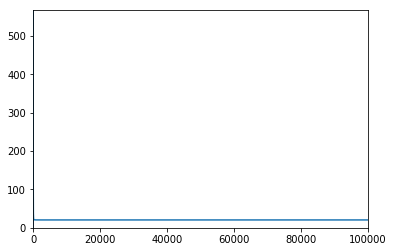

In [23]:
plt.plot(range(len(log_loss)), log_loss)
plt.axis([0, training_epochs, 0, np.max(log_loss)])
plt.show()

Make some predictions on the test dataset and calculate the mean squared error:

In [28]:
pred_y = sess.run(y_, feed_dict={X: testX})
mse = tf.reduce_mean(tf.square(pred_y - testY))
print("MSE: %.4f" % sess.run(mse))

MSE: 27.1732


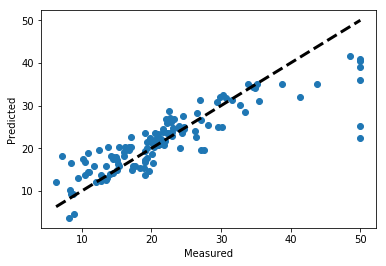

In [29]:
fig, ax = plt.subplots()
ax.scatter(testY, pred_y)
ax.plot([testY.min(), testY.max()], [testY.min(), testY.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()